# Infilling Human Antibody Sequences using Sapiens

In [2]:
import anthroab as ab

## Infilling an antibody sequence

Positions marked with * or X will be infilled with the most likely human residues, given the rest of the sequence

In [3]:
seq = '**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS'

print(seq)
print(ab.predict_masked(seq, 'H'))# H or L for Heavy or Light (kappa and lambda are using the same model)
print()

**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS
QVQLVQSGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS





Predictions can even be made in CDR3 regions

In [4]:
seq = 'QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS'

print(seq)
print(ab.predict_masked(seq, 'H'))
print()

QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS
QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYGDSGGFDYWGQGTTVTVSS



Use `predict_best_score` to humanize all positions, not just masks:

In [5]:
seq = 'QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS'

print(seq)
print(ab.predict_best_score(seq, 'H'))
print()

QVLQVESGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS
QVQLVQSGAEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGWINPSNGGTNFAEKFKGRVTLTTDSSTTTAYMELKSLRFDDTAVYYCARRDYGDSGGFDYWGQGTLVTVSS



can process a sequence is miliseconds:

In [7]:
%%timeit

ab.predict_masked(
    '******SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDY*****FDYWGQGTTVTVSS',
    'H'  # H or L (kappa and lambda are using the same model)
)

28.8 ms ± 298 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Suggesting mutations

Scores are given both for residues that are masked and that are present.  
When inputting a non-human antibody sequence, the output scores can be used for humanization.

In [8]:
scores = ab.predict_scores(
    '**QLV*SGVEVKKPGASVKVSCKASGYTFTNYYMYWVRQAPGQGLEWMGGINPSNGGTNFNEKFKNRVTLTTDSSTTTAYMELKSLQFDDTAVYYCARRDYRFDMGFDYWGQGTTVTVSS',
    'H'
)
scores

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0.004156,0.003812,0.004254,0.003708,0.003810,0.004162,0.019577,0.003796,0.003910,0.004024,0.003822,0.004207,0.003788,0.888856,0.004306,0.003917,0.003908,0.003878,0.004001,0.004299
1,0.013643,0.004196,0.008402,0.014372,0.004418,0.012703,0.004797,0.009233,0.004120,0.009981,0.020910,0.004372,0.004464,0.004483,0.004395,0.004387,0.004204,0.837337,0.004220,0.004120
2,0.004520,0.004055,0.004210,0.004326,0.004203,0.004095,0.006023,0.003844,0.004178,0.004379,0.004186,0.004382,0.004767,0.897642,0.004385,0.004055,0.003934,0.004148,0.004104,0.004198
3,0.004024,0.004041,0.003963,0.003970,0.003866,0.003945,0.003997,0.003959,0.004018,0.903378,0.004398,0.003747,0.004120,0.003941,0.003987,0.004057,0.003981,0.005505,0.003855,0.003874
4,0.004312,0.004120,0.004093,0.004236,0.003931,0.004235,0.003995,0.003890,0.004045,0.004592,0.005274,0.004135,0.004194,0.004092,0.004257,0.003994,0.003908,0.899741,0.004111,0.004127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.003920,0.003949,0.004099,0.003809,0.003886,0.003878,0.003831,0.008121,0.003970,0.006975,0.004048,0.003881,0.003960,0.004050,0.004120,0.003775,0.003799,0.898536,0.003825,0.003911
116,0.006378,0.004160,0.004092,0.004240,0.004266,0.004108,0.004232,0.010123,0.004035,0.004520,0.004105,0.004233,0.004102,0.004238,0.004536,0.007919,0.886251,0.005273,0.004142,0.004221
117,0.004189,0.004011,0.003946,0.003930,0.004006,0.003912,0.003946,0.004958,0.004029,0.004161,0.004138,0.004005,0.004026,0.004049,0.004147,0.004031,0.003969,0.902405,0.003992,0.003992
118,0.004940,0.003911,0.003865,0.003801,0.004455,0.003826,0.003947,0.003769,0.003876,0.003896,0.003832,0.003546,0.004391,0.003922,0.003851,0.904159,0.004483,0.003890,0.003882,0.004212


### Visualizing suggested mutations

In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.5-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (107 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.5-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
Using cached 

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
def visualize_scores(sequence, chain_type):
    preds = ab.predict_scores(sequence, chain_type)
    sns.set(rc={'figure.figsize':(12, 24)})
    labels = [f"{i}: {pos}" for i, pos in enumerate(sequence)]
    p = sns.heatmap(preds, yticklabels=labels, cmap="mako")
    p.xaxis.tick_top()

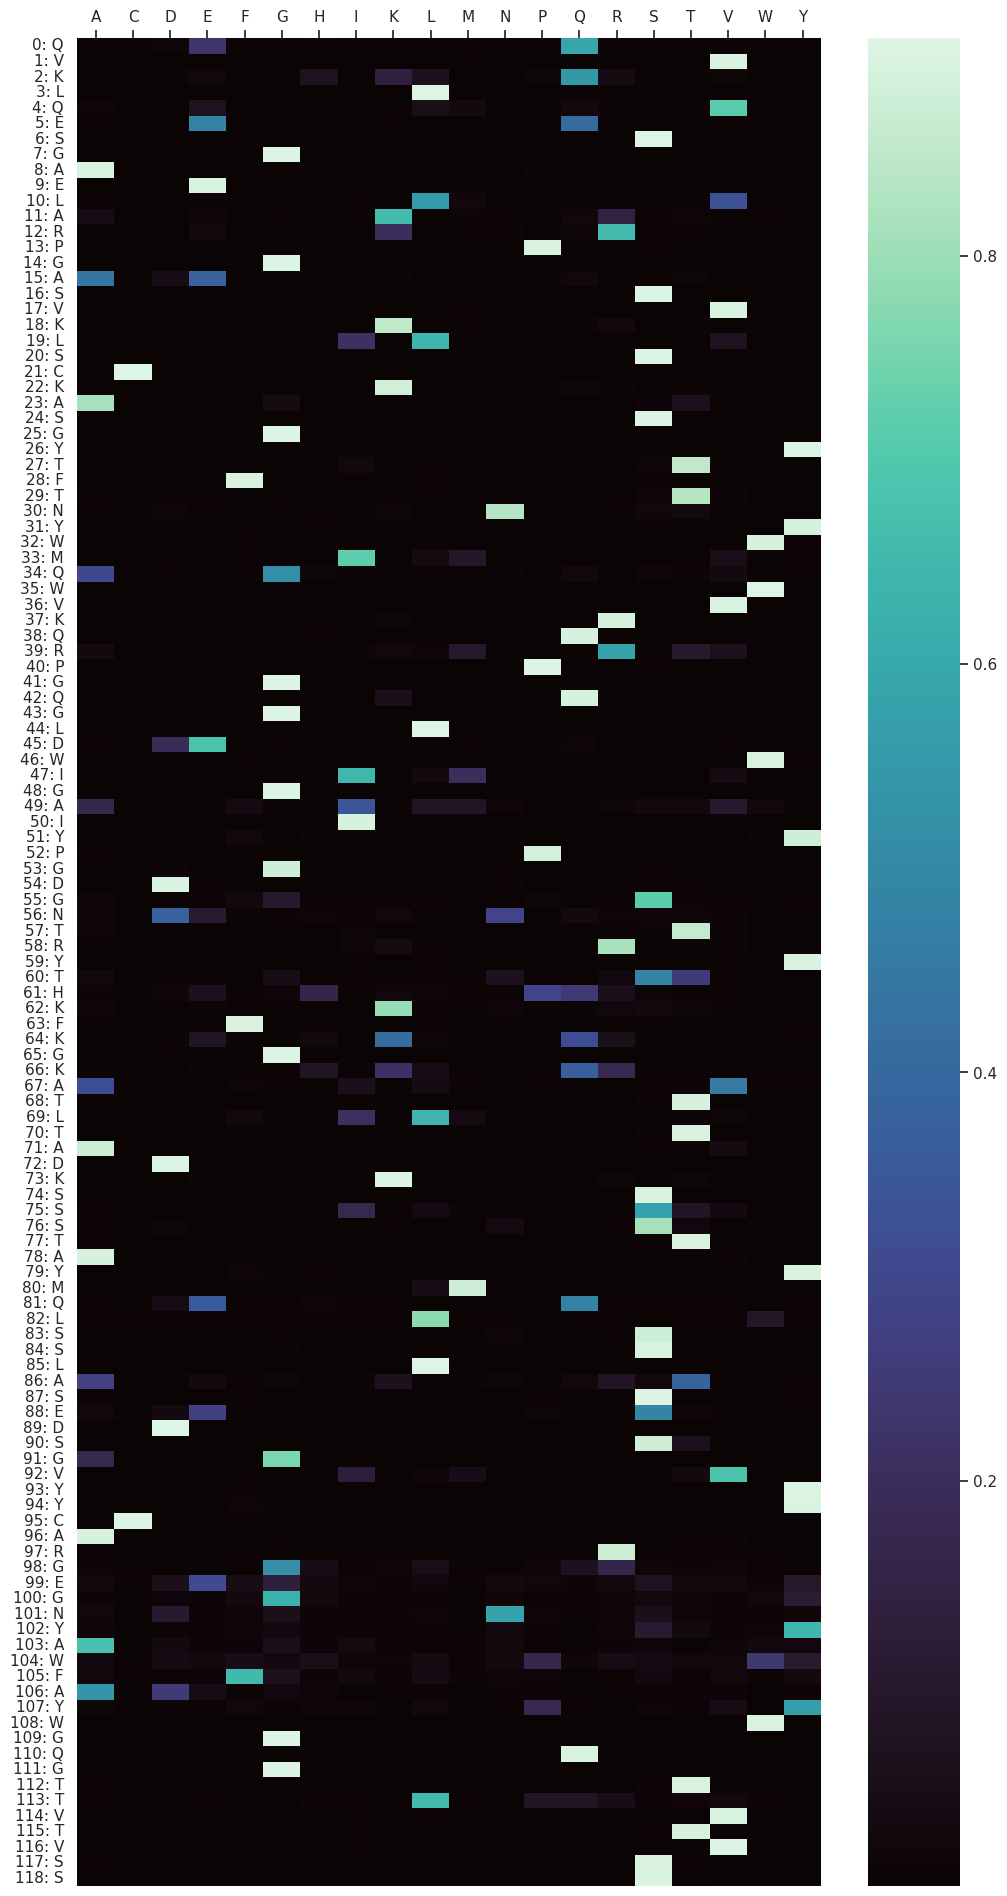

In [14]:
visualize_scores(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS',
    'H'
)

Show only the five most probable residues for each position:

In [15]:
def visualize_top_five(sequence, chain_type, offset=0, length=15):
    preds = ab.predict_scores(sequence, chain_type)
    preds.index = list(sequence)
    
    numbers = preds.T.reset_index(drop=True).T
    numbers = numbers.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
    numbers.columns = numbers.columns + 1
    
    annot = preds.apply(lambda row: (row.sort_values(ascending=False).index + '\n' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
    annot.columns = annot.columns + 1
    
    fig, ax = plt.subplots(figsize=(16, 3))
    sns.heatmap(numbers.iloc[offset:length + offset,:5].T, annot=annot.iloc[offset:length + offset,:5].T, fmt='s', ax=ax, robust=True, vmax=1, vmin=0, cmap='Greens', cbar_kws={'label': 'Probability'});
    for i in range(length):
        ax.axvline(i, color='white', lw=5)
    ax.set_ylabel('Top predictions');
    ax.xaxis.tick_top()
    plt.xticks(rotation=0, fontsize=15);

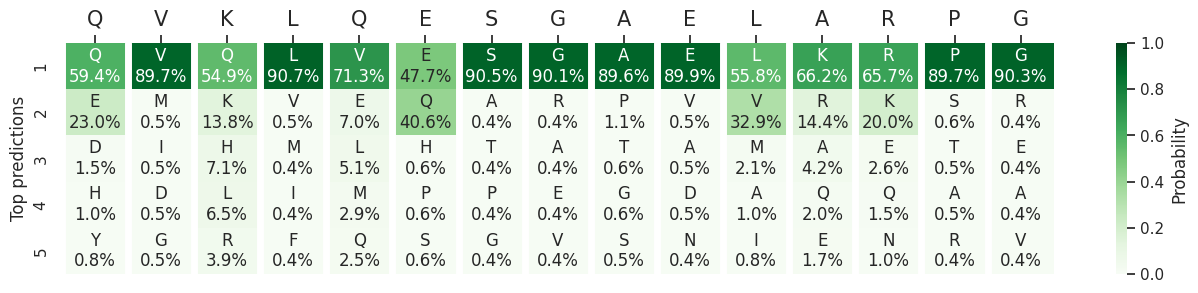

In [16]:
visualize_top_five(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H',
    offset=0, 
    length=15
)

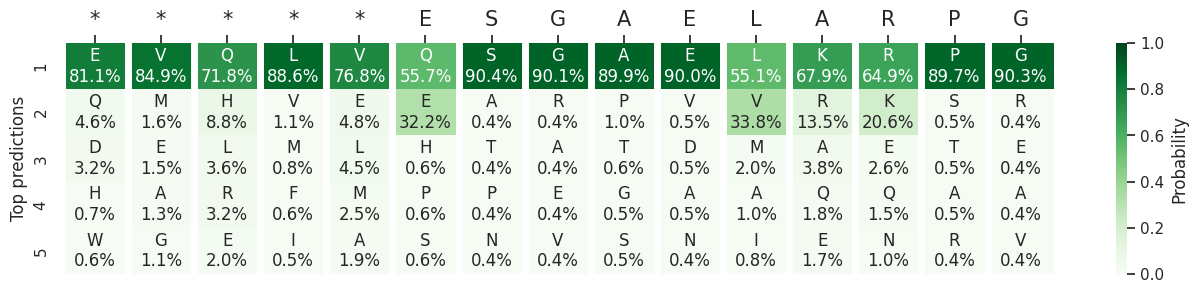

In [17]:
visualize_top_five(
    '*****ESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H',
    offset=0, 
    length=15
)

In [18]:
def visualize_top_five_vertical(sequence, chain_type):
    preds = ab.predict_scores(sequence, chain_type)
    preds.index = list(sequence)
    
    numbers = preds.T.reset_index(drop=True).T
    numbers = numbers.apply(lambda row: pd.Series(row.sort_values(ascending=False).values, row.index), axis=1)
    numbers.columns = numbers.columns + 1
    
    annot = preds.apply(lambda row: (row.sort_values(ascending=False).index + '   ' + row.sort_values(ascending=False).apply('{:.1%}'.format)).reset_index(drop=True), axis=1)
    annot.columns = annot.columns + 1
    
    fig, ax = plt.subplots(figsize=(8, 35))
    sns.heatmap(numbers.iloc[:,:5], annot=annot.iloc[:,:5], fmt='s', ax=ax, robust=True, vmax=0.5, cmap='Greens');
    plt.yticks(rotation=0, fontsize=13);

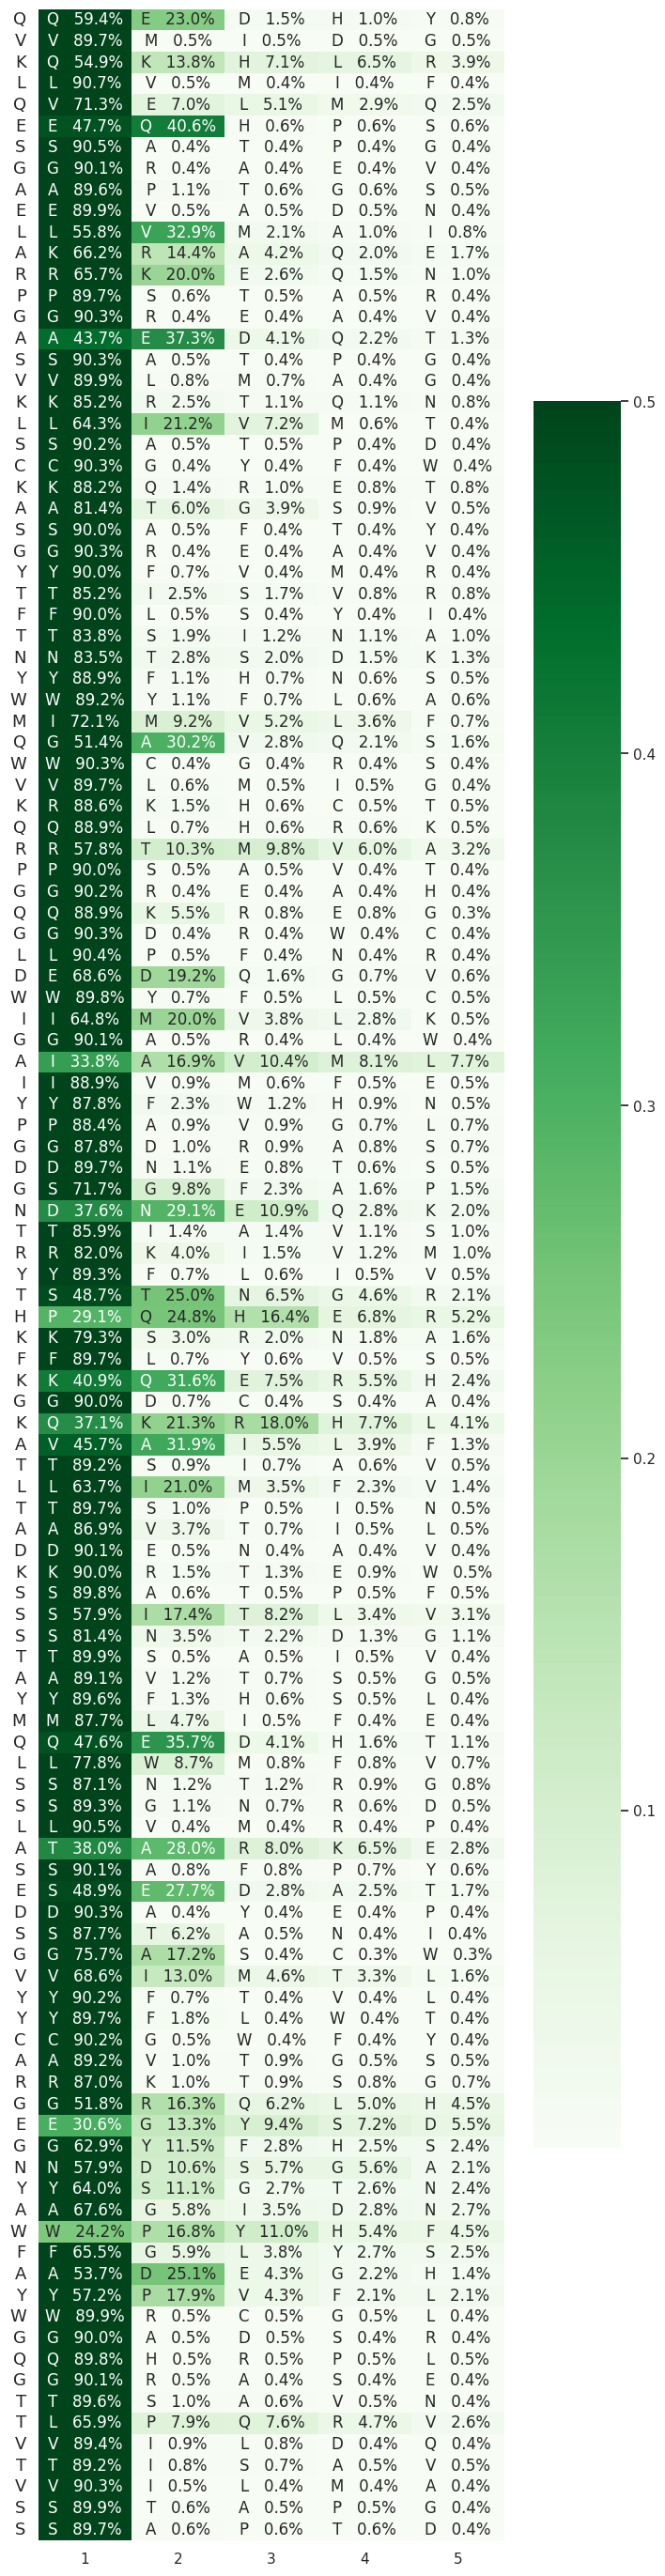

In [19]:
visualize_top_five_vertical(
    'QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS', 
    'H'
)

#### Note: This notebook is adapted from sapiens repo